In [25]:
%matplotlib inline

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping 
import numpy as np
import matplotlib.pyplot as plt

# Create the model

In [62]:
def make_model(): # create multiple identical models for comparison purposes
    model = Sequential()
    model.add(Dense(20,))
    for hidden_layers in range(4):
        model.add(Dense(80,))
        model.add(LeakyReLU(0.01))
    model.add(Dense(18,))

    opt = Adam(lr=1e-5)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae', 'mse'])
    return model


ham = make_model()
ddm = make_model()


# Read the training data
X  = np.load('train/X.npy')
Y  = np.load('train/Y.npy')
Xv = np.load('validation/X.npy')
Yv = np.load('validation/Y.npy')

In [63]:
# don't predict boundary conditions
Y  =  Y[:,1:-1]
Yv = Yv[:,1:-1]

# fixup the ddm method so it predicts T_{n+1} from T_{n}, but don't map from the end of one
# time  series to the start of the next one (with different alpha value)
Xddm = X
Yddm = X
Yddm = Yddm[:,1:-1] # drop boundary conditions
Xddm = np.delete(Xddm, np.arange(5000, 5001*16, 5001), axis=0) # drop the endpoint of time series
Yddm = np.delete(Yddm, np.arange(   0, 5001*16, 5001), axis=0) # drop the startpoint of time series

# repeat for validation data to be used in ddm
Xddm_v = Xv
Yddm_v = Xv
Yddm_v = Yddm_v[:,1:-1] # drop boundary conditions
Xddm_v = np.delete(Xddm_v, np.arange(5000, 5001*16, 5001), axis=0) # drop the endpoint of time series
Yddm_v = np.delete(Yddm_v, np.arange(   0, 5001*16, 5001), axis=0) # drop the startpoint of time series


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


In [64]:
print(X.shape)
print(Xv.shape)
print(Y.shape)
print(Xddm.shape)
print(Yddm.shape)

(80016, 20)
(10002, 20)
(80016, 18)
(80000, 20)
(80000, 18)


# Train the model

In [65]:
early_stopping_monitor = EarlyStopping(patience=20) 
history_ham = ham.fit(X,Y, 
                      batch_size=32,
                      epochs=90,
                      validation_data=(Xv,Yv),
                      callbacks=[early_stopping_monitor])

Train on 80016 samples, validate on 10002 samples
Epoch 1/90
80016/80016 [==============================] - 3s 41us/step - loss: 0.4705 - mean_absolute_error: 0.4109 - mean_squared_error: 0.4705 - val_loss: 0.0572 - val_mean_absolute_error: 0.1718 - val_mean_squared_error: 0.0572
Epoch 2/90
80016/80016 [==============================] - 3s 36us/step - loss: 0.0225 - mean_absolute_error: 0.1045 - mean_squared_error: 0.0225 - val_loss: 0.0042 - val_mean_absolute_error: 0.0475 - val_mean_squared_error: 0.0042
Epoch 3/90
80016/80016 [==============================] - 3s 36us/step - loss: 0.0018 - mean_absolute_error: 0.0307 - mean_squared_error: 0.0018 - val_loss: 6.4253e-04 - val_mean_absolute_error: 0.0198 - val_mean_squared_error: 6.4253e-04
Epoch 4/90
80016/80016 [==============================] - 3s 36us/step - loss: 4.1980e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 4.1980e-04 - val_loss: 2.2456e-04 - val_mean_absolute_error: 0.0111 - val_mean_squared_error: 2.2456e-04
Ep

80016/80016 [==============================] - 3s 37us/step - loss: 1.4252e-09 - mean_absolute_error: 2.7059e-05 - mean_squared_error: 1.4252e-09 - val_loss: 1.2628e-09 - val_mean_absolute_error: 2.5585e-05 - val_mean_squared_error: 1.2628e-09
Epoch 34/90
80016/80016 [==============================] - 3s 42us/step - loss: 1.3349e-09 - mean_absolute_error: 2.6217e-05 - mean_squared_error: 1.3349e-09 - val_loss: 1.1862e-09 - val_mean_absolute_error: 2.4911e-05 - val_mean_squared_error: 1.1862e-09
Epoch 35/90
80016/80016 [==============================] - 3s 36us/step - loss: 1.2529e-09 - mean_absolute_error: 2.5402e-05 - mean_squared_error: 1.2529e-09 - val_loss: 1.1508e-09 - val_mean_absolute_error: 2.4243e-05 - val_mean_squared_error: 1.1508e-09
Epoch 36/90
80016/80016 [==============================] - 3s 40us/step - loss: 1.1793e-09 - mean_absolute_error: 2.4657e-05 - mean_squared_error: 1.1793e-09 - val_loss: 1.0462e-09 - val_mean_absolute_error: 2.3392e-05 - val_mean_squared_error:

80016/80016 [==============================] - 3s 37us/step - loss: 3.7338e-10 - mean_absolute_error: 1.3289e-05 - mean_squared_error: 3.7338e-10 - val_loss: 3.0747e-10 - val_mean_absolute_error: 1.2052e-05 - val_mean_squared_error: 3.0747e-10
Epoch 66/90
80016/80016 [==============================] - 3s 39us/step - loss: 3.6483e-10 - mean_absolute_error: 1.3136e-05 - mean_squared_error: 3.6483e-10 - val_loss: 2.9579e-10 - val_mean_absolute_error: 1.1962e-05 - val_mean_squared_error: 2.9579e-10
Epoch 67/90
80016/80016 [==============================] - 3s 41us/step - loss: 3.5669e-10 - mean_absolute_error: 1.2982e-05 - mean_squared_error: 3.5669e-10 - val_loss: 3.0188e-10 - val_mean_absolute_error: 1.2045e-05 - val_mean_squared_error: 3.0188e-10
Epoch 68/90
80016/80016 [==============================] - 3s 40us/step - loss: 3.5026e-10 - mean_absolute_error: 1.2873e-05 - mean_squared_error: 3.5026e-10 - val_loss: 2.8412e-10 - val_mean_absolute_error: 1.1634e-05 - val_mean_squared_error:

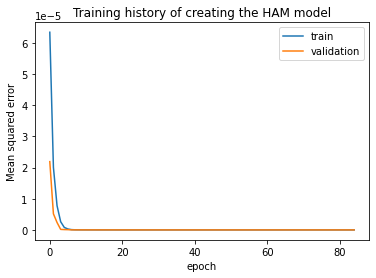

In [66]:
plt.plot(history_ham.history['mean_squared_error'][5:])
plt.plot(history_ham.history['val_mean_squared_error'][5:])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error')
plt.title('Training history of creating the HAM model')
plt.show()

In [67]:
early_stopping_monitor = EarlyStopping(patience=20) 
history_ddm = ddm.fit(Xddm, Yddm,
                      batch_size=32,
                      epochs=90,
                      validation_data=(Xddm_v,Yddm_v),
                      callbacks=[early_stopping_monitor])

Train on 80000 samples, validate on 10000 samples
Epoch 1/90
80000/80000 [==============================] - 4s 46us/step - loss: 6.7325 - mean_absolute_error: 2.1370 - mean_squared_error: 6.7325 - val_loss: 3.6650 - val_mean_absolute_error: 1.4799 - val_mean_squared_error: 3.6650
Epoch 2/90
80000/80000 [==============================] - 3s 36us/step - loss: 1.5285 - mean_absolute_error: 0.8453 - mean_squared_error: 1.5285 - val_loss: 0.2950 - val_mean_absolute_error: 0.3469 - val_mean_squared_error: 0.2950
Epoch 3/90
80000/80000 [==============================] - 3s 41us/step - loss: 0.1103 - mean_absolute_error: 0.2089 - mean_squared_error: 0.1103 - val_loss: 0.0157 - val_mean_absolute_error: 0.0933 - val_mean_squared_error: 0.0157
Epoch 4/90
80000/80000 [==============================] - 3s 43us/step - loss: 0.0147 - mean_absolute_error: 0.0909 - mean_squared_error: 0.0147 - val_loss: 0.0051 - val_mean_absolute_error: 0.0539 - val_mean_squared_error: 0.0051
Epoch 5/90
80000/80000 [==

80000/80000 [==============================] - 3s 42us/step - loss: 1.0744e-05 - mean_absolute_error: 9.3975e-04 - mean_squared_error: 1.0744e-05 - val_loss: 7.7692e-06 - val_mean_absolute_error: 8.3934e-04 - val_mean_squared_error: 7.7692e-06
Epoch 35/90
80000/80000 [==============================] - 3s 43us/step - loss: 9.8616e-06 - mean_absolute_error: 9.0217e-04 - mean_squared_error: 9.8616e-06 - val_loss: 7.1791e-06 - val_mean_absolute_error: 7.9353e-04 - val_mean_squared_error: 7.1791e-06
Epoch 36/90
80000/80000 [==============================] - 3s 40us/step - loss: 9.1293e-06 - mean_absolute_error: 8.6971e-04 - mean_squared_error: 9.1293e-06 - val_loss: 6.7933e-06 - val_mean_absolute_error: 8.1859e-04 - val_mean_squared_error: 6.7933e-06
Epoch 37/90
80000/80000 [==============================] - 3s 40us/step - loss: 8.5179e-06 - mean_absolute_error: 8.3903e-04 - mean_squared_error: 8.5179e-06 - val_loss: 6.4267e-06 - val_mean_absolute_error: 7.2847e-04 - val_mean_squared_error:

80000/80000 [==============================] - 3s 35us/step - loss: 3.3435e-06 - mean_absolute_error: 4.6397e-04 - mean_squared_error: 3.3435e-06 - val_loss: 2.0266e-06 - val_mean_absolute_error: 3.9030e-04 - val_mean_squared_error: 2.0266e-06
Epoch 67/90
80000/80000 [==============================] - 3s 36us/step - loss: 3.2302e-06 - mean_absolute_error: 4.5671e-04 - mean_squared_error: 3.2302e-06 - val_loss: 1.9541e-06 - val_mean_absolute_error: 3.9145e-04 - val_mean_squared_error: 1.9541e-06
Epoch 68/90
80000/80000 [==============================] - 3s 36us/step - loss: 3.1171e-06 - mean_absolute_error: 4.5181e-04 - mean_squared_error: 3.1171e-06 - val_loss: 1.8694e-06 - val_mean_absolute_error: 4.2387e-04 - val_mean_squared_error: 1.8694e-06
Epoch 69/90
80000/80000 [==============================] - 3s 35us/step - loss: 3.0087e-06 - mean_absolute_error: 4.4682e-04 - mean_squared_error: 3.0087e-06 - val_loss: 1.7842e-06 - val_mean_absolute_error: 3.6200e-04 - val_mean_squared_error:

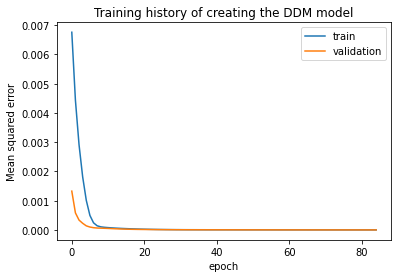

In [68]:
plt.plot(history_ddm.history['mean_squared_error'][5:])
plt.plot(history_ddm.history['val_mean_squared_error'][5:])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('Mean squared error')
plt.title('Training history of creating the DDM model')
plt.show()

In [69]:
print(ham.summary())
ham.save('ham.h5')
ddm.save('ddm.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_22 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 18)                378       
Total params: 1,638
Trainable params: 1,638
Non-trainable params: 0
_________________________________________________________________
None


# Verify against test cases

In [70]:
import IFEM_CoSTA
import splipy as sp
from keras.models import load_model
from os import listdir
from tqdm import tqdm

In [37]:
ham = load_model('ham.h5')
ddm = load_model('ddm.h5')

In [71]:
spline = sp.Curve()
spline.raise_order(1)
spline.refine(17) # for a grand total of 20 controlpoints with p=2
spline = spline.set_dimension(1)

100%|██████████| 5000/5000 [00:21<00:00, 238.79it/s]


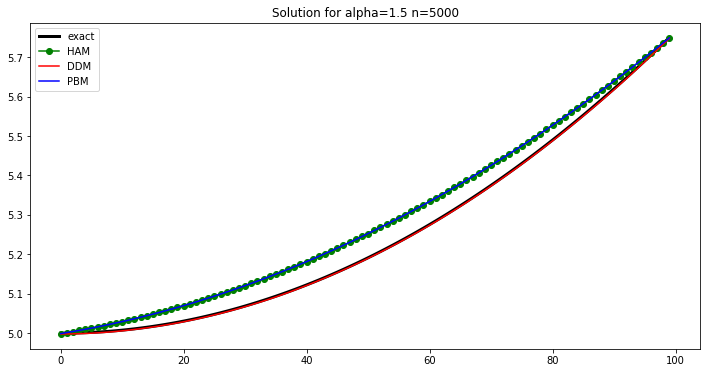

100%|██████████| 5000/5000 [00:20<00:00, 240.75it/s]


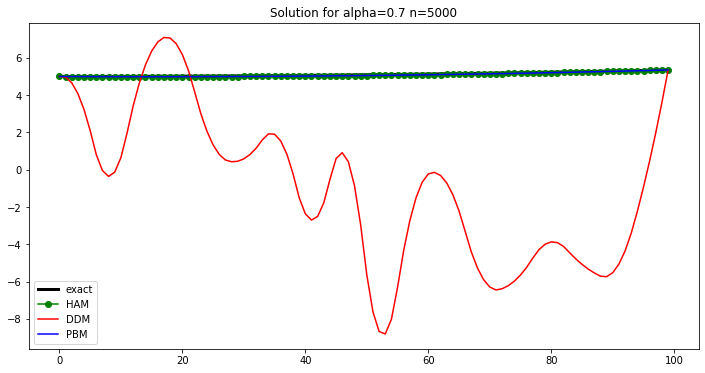

100%|██████████| 5000/5000 [00:20<00:00, 242.79it/s]


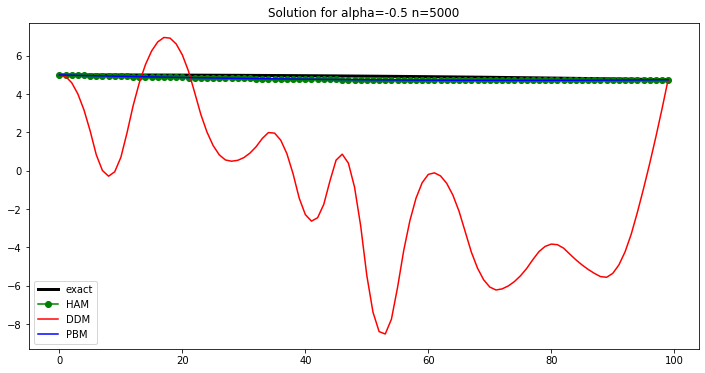

100%|██████████| 5000/5000 [00:19<00:00, 252.62it/s]


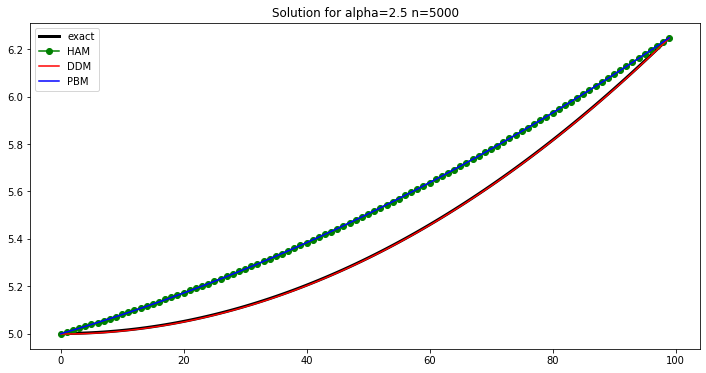

In [72]:
for myfile in listdir('test'):
    if myfile[0] != 'X': continue
    alpha = int(myfile[3:-4])/10
    
    X  = np.load(f'test/{myfile}')

    pbm = IFEM_CoSTA.HeatEquation('test/P1.xinp')
    mu = {'dt':0.001, 't':0.0, 'ALPHA':alpha}
    u_pbm_prev = pbm.initial_condition(mu)
    u_ddm_prev = pbm.initial_condition(mu)
    u_ham_prev = pbm.initial_condition(mu)
    zeros = [0.0]*pbm.ndof
    sigma = [0.0]*pbm.ndof
    
    # reshape data to fit into tensorflow
    u_ddm_prev = np.array(u_ddm_prev, ndmin=2)
                                                                               
    # run time iterations
    for n in tqdm(range(5000)):
        # fetch the boundary conditions
        ud = pbm.initial_condition(mu)
        
        # create a predictor step for ham
        u_ham_pred = pbm.predict(mu, u_ham_prev)

        # create a correction term for ham
        sigma[1:-1] = -ham.predict(np.array(u_ham_pred, ndmin=2)).flatten()
                                          
        # update the next step with a corrector
        u_pbm_prev         = pbm.correct(mu, u_pbm_prev, zeros)
        u_ham_prev         = pbm.correct(mu, u_ham_prev, sigma)
        u_ddm_prev[0,1:-1] = ddm.predict(u_ddm_prev)
        u_ddm_prev[0,0]    = ud[0]
        u_ddm_prev[0,-1]   = ud[-1]

        # update values
        mu['t'] += mu['dt']
        
    plt.figure(figsize=(12,6))
    
    x = np.linspace(0,1,100)
    N = spline.bases[0](x)
    plt.plot((N@X[-1,:]).T, 'k-', linewidth=3)
    plt.plot((N@u_ham_prev).T, 'go-')
    plt.plot((N@u_ddm_prev.flatten()).T, 'r-')
    plt.plot((N@u_pbm_prev).T, 'b-')
    plt.legend(['exact', 'HAM', 'DDM', 'PBM'])
    # plt.legend(['PBM', 'HAM', 'exact'])
    plt.title(f'Solution for alpha={alpha} n=5000')
    plt.show()


In [48]:
np.array(u_ham_prev) - np.array(u_pbm_prev)

array([ 0.00000000e+00,  2.58286049e-04,  4.99450050e-04,  3.88336218e-04,
        2.10684202e-04, -1.86462826e-04, -1.64582816e-04, -3.01337329e-04,
       -3.71903747e-04,  1.12820553e-04,  6.46961009e-05,  2.69350818e-04,
        5.09385820e-04,  4.51071726e-04,  9.77250736e-04,  5.33171560e-04,
        7.27377295e-04,  5.81045521e-04,  4.38037646e-04,  0.00000000e+00])

In [49]:
np.array(u_ham_prev) - X[-1,:]

array([-0.001     ,  0.00620273,  0.01878957,  0.02948093,  0.03856254,
        0.04588144,  0.05207616,  0.05656903,  0.05958489,  0.06161282,
        0.0615647 ,  0.06022614,  0.05737976,  0.05269181,  0.04704515,
        0.03888502,  0.02981997,  0.01887117,  0.00638248, -0.001     ])

In [60]:
u_ham_prev

[4.999000000000004,
 5.020604545361921,
 5.066074652737672,
 5.113583131710471,
 5.163970864885298,
 5.21678599067107,
 5.273946110025529,
 5.333730482275414,
 5.3967944491720266,
 5.4646112248115,
 5.533927333457449,
 5.607080267083859,
 5.683419262360882,
 5.761955446849129,
 5.845316219204959,
 5.928856291026297,
 6.01739576594962,
 6.108002510323992,
 6.201701169506285,
 6.249000000000004]

In [51]:
print(sigma)

[0.0, 0.0035352886, 0.00525294, 0.0025140056, 0.0015766139, -0.003894181, 0.00044790737, -0.0019841592, -0.0052637607, 0.003969948, -0.0015414194, -0.00028785865, 0.0017206012, -0.0032087078, 0.007974335, -0.0037270535, 0.0021617399, 0.0031808347, 0.0065875547, 0.0]
